In [1]:
import pandas as pd
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import io
from scipy import ndimage
import numpy as np

In [2]:
DATA_PATH    = 'D:\ThesisData\data'
CATALOG_PATH = 'D:\ThesisData/CATALOG.csv' 

In [3]:
file_index = 0
with h5py.File('%s/vil/2018/SEVIR_VIL_STORMEVENTS_2018_0101_0630.h5' % DATA_PATH,'r') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
print('Event ID:',event_id)
# image = np.array(vil[:,:,10])

Event ID: b'S728503'


In [4]:
from findCenter import findCenter
features = ['X', 'Y']
position = pd.DataFrame([], index=np.arange(vil.shape[2]), columns=features)
weighted_Position = pd.DataFrame([], index=np.arange(vil.shape[2]), columns=features)

In [5]:
for image in range(0, vil.shape[2]):
    vals = findCenter(vil[:,:,image], 100)
    weightedVals, unweightedVals = vals[0], vals[1]
    weighted_Position.loc[image,:] = weightedVals
    position.loc[image,:] = unweightedVals

In [6]:
position.head(5)

,X,Y
0,260.422861,123.008538
1,257.309659,123.19115
2,259.440182,126.80496
3,255.106673,127.834861
4,255.30433,131.031295


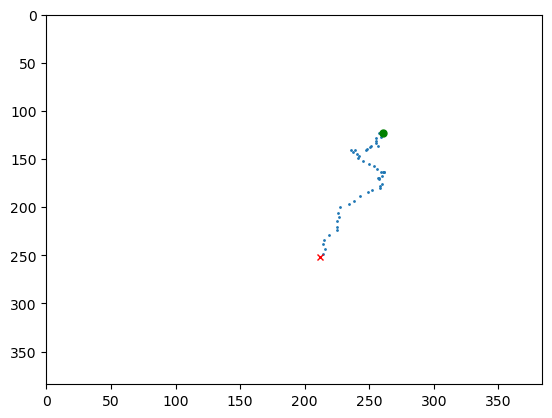

In [7]:
fig = plt.scatter(position.iloc[:,0], position.iloc[:,1], s=1)
plt.plot(position.iloc[0,0], position.iloc[0,1], 'og', markersize=5)
plt.plot(position.iloc[vil.shape[2]-1,0], position.iloc[vil.shape[2]-1,1], 'xr', markersize=5)
ax = plt.gca()
ax.set_xlim([0, 384])
ax.set_ylim([0, 384])
plt.gca().invert_yaxis()


## Making Velocity Vector (XY components) from Position

In [8]:
features = ['X', 'Y']
velocity = np.diff(position, axis=0)
weighted_velocity = np.diff(weighted_Position, axis=0)

In [9]:
weighted_velocity.shape

(48, 2)